## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

model = build_mlp()

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 5s 25ms/step - loss: 2.2670 - accuracy: 0.1569 - val_loss: 2.2213 - val_accuracy: 0.2024
Epoch 2/500
196/196 [==============================] - 3s 17ms/step - loss: 2.1942 - accuracy: 0.2220 - val_loss: 2.1639 - val_accuracy: 0.2434
Epoch 3/500
196/196 [==============================] - 6s 32ms/step - loss: 2.1419 - accuracy: 0.2473 - val_loss: 2.1161 - val_accuracy: 0.2620
Epoch 4/500
196/196 [==============================] - 6s 33ms/step - loss: 2.0971 - accuracy: 0.2616 - val_loss: 2.0739 - val_accuracy: 0.2720
Epoch 5/500
196/196 [==============================] - 6s 33ms/step - loss: 2.0577 - accuracy: 0.2729 - val_loss: 2.0382 - val_accuracy: 0.2827
Epoch 6/500
196/196 [==============================] - 6s 33ms/step - loss: 2.0250 - accuracy: 0.2834 - val_loss: 2.0084 - val_accuracy: 0.2905
Epoch 7/500
196/196 [==============================] - 7s 34ms/step - loss: 1.9980 - accuracy: 0.2911 - val_loss: 1.9848 - val_accuracy:

196/196 [==============================] - 7s 36ms/step - loss: 1.5263 - accuracy: 0.4686 - val_loss: 1.5499 - val_accuracy: 0.4556
Epoch 114/500
196/196 [==============================] - 7s 36ms/step - loss: 1.5246 - accuracy: 0.4692 - val_loss: 1.5512 - val_accuracy: 0.4550
Epoch 115/500
196/196 [==============================] - 7s 36ms/step - loss: 1.5227 - accuracy: 0.4702 - val_loss: 1.5477 - val_accuracy: 0.4547
Epoch 116/500
196/196 [==============================] - 7s 37ms/step - loss: 1.5208 - accuracy: 0.4699 - val_loss: 1.5459 - val_accuracy: 0.4617
Epoch 117/500
196/196 [==============================] - 7s 37ms/step - loss: 1.5189 - accuracy: 0.4708 - val_loss: 1.5425 - val_accuracy: 0.4582
Epoch 118/500
196/196 [==============================] - 7s 36ms/step - loss: 1.5173 - accuracy: 0.4719 - val_loss: 1.5455 - val_accuracy: 0.4578
Epoch 119/500
196/196 [==============================] - 7s 37ms/step - loss: 1.5153 - accuracy: 0.4714 - val_loss: 1.5400 - val_accuracy:

196/196 [==============================] - 7s 38ms/step - loss: 1.3497 - accuracy: 0.5281 - val_loss: 1.4323 - val_accuracy: 0.4893
Epoch 226/500
196/196 [==============================] - 7s 37ms/step - loss: 1.3487 - accuracy: 0.5290 - val_loss: 1.4238 - val_accuracy: 0.4945
Epoch 227/500
196/196 [==============================] - 7s 37ms/step - loss: 1.3469 - accuracy: 0.5306 - val_loss: 1.4265 - val_accuracy: 0.4910
Epoch 228/500
196/196 [==============================] - 7s 37ms/step - loss: 1.3459 - accuracy: 0.5298 - val_loss: 1.4312 - val_accuracy: 0.4851
Epoch 229/500
196/196 [==============================] - 7s 37ms/step - loss: 1.3445 - accuracy: 0.5314 - val_loss: 1.4303 - val_accuracy: 0.4885
Epoch 230/500
196/196 [==============================] - 7s 36ms/step - loss: 1.3431 - accuracy: 0.5305 - val_loss: 1.4262 - val_accuracy: 0.4966
Epoch 231/500
196/196 [==============================] - 7s 37ms/step - loss: 1.3409 - accuracy: 0.5310 - val_loss: 1.4204 - val_accuracy:

196/196 [==============================] - 7s 36ms/step - loss: 1.2117 - accuracy: 0.5760 - val_loss: 1.3705 - val_accuracy: 0.5098
Epoch 338/500
196/196 [==============================] - 7s 37ms/step - loss: 1.2110 - accuracy: 0.5764 - val_loss: 1.3643 - val_accuracy: 0.5155
Epoch 339/500
196/196 [==============================] - 7s 37ms/step - loss: 1.2092 - accuracy: 0.5769 - val_loss: 1.3861 - val_accuracy: 0.5090
Epoch 340/500
196/196 [==============================] - 7s 36ms/step - loss: 1.2092 - accuracy: 0.5763 - val_loss: 1.3578 - val_accuracy: 0.5177
Epoch 341/500
196/196 [==============================] - 7s 36ms/step - loss: 1.2080 - accuracy: 0.5782 - val_loss: 1.3756 - val_accuracy: 0.5054
Epoch 342/500
196/196 [==============================] - 7s 36ms/step - loss: 1.2070 - accuracy: 0.5784 - val_loss: 1.3583 - val_accuracy: 0.5176
Epoch 343/500
196/196 [==============================] - 7s 36ms/step - loss: 1.2051 - accuracy: 0.5787 - val_loss: 1.3723 - val_accuracy:

196/196 [==============================] - 8s 42ms/step - loss: 1.0918 - accuracy: 0.6186 - val_loss: 1.3346 - val_accuracy: 0.5312
Epoch 450/500
196/196 [==============================] - 8s 40ms/step - loss: 1.0891 - accuracy: 0.6218 - val_loss: 1.3304 - val_accuracy: 0.5320
Epoch 451/500
196/196 [==============================] - 8s 40ms/step - loss: 1.0876 - accuracy: 0.6207 - val_loss: 1.3310 - val_accuracy: 0.5330
Epoch 452/500
196/196 [==============================] - 8s 40ms/step - loss: 1.0880 - accuracy: 0.6207 - val_loss: 1.3469 - val_accuracy: 0.5288
Epoch 453/500
196/196 [==============================] - 8s 41ms/step - loss: 1.0862 - accuracy: 0.6214 - val_loss: 1.3367 - val_accuracy: 0.5291
Epoch 454/500
196/196 [==============================] - 8s 43ms/step - loss: 1.0834 - accuracy: 0.6230 - val_loss: 1.3660 - val_accuracy: 0.5162
Epoch 455/500
196/196 [==============================] - 7s 35ms/step - loss: 1.0858 - accuracy: 0.6220 - val_loss: 1.3562 - val_accuracy:

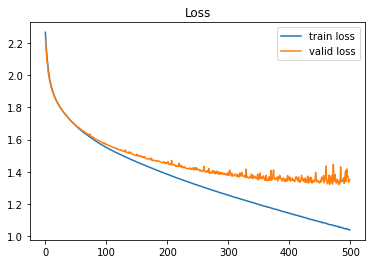

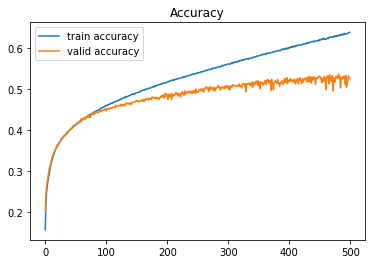

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()